In [8]:
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# ------- define paths -------
relative_path = Path('../data/intermediate_data/') # define relative path
absolute_path = relative_path.resolve() # get absolute path

# ------- import data -------
assess_df = pd.read_csv(absolute_path/'assess_recc_ppi_emissions.csv') # Import Assess Emissions

/tmp/ipykernel_455977/1910879866.py:6: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  assess_df = pd.read_csv(absolute_path/'assess_recc_ppi_emissions.csv') # Import Assess Emissions


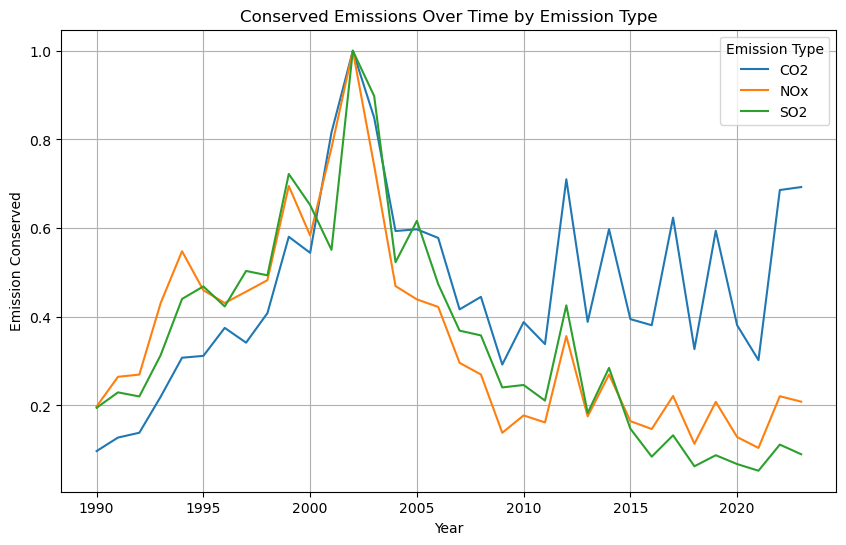

In [6]:
# Group by year and emission_type, summing the emission_conserved
assess_df = assess_df.groupby(['year', 'emission_type'], as_index=False)['emission_conserved'].sum()

# Pivot the table so we can plot each emission type on a separate line
assess_df_pivot = assess_df.pivot(index='year', columns='emission_type', values='emission_conserved')

assess_df_pivot = assess_df_pivot / assess_df_pivot.max()

# Plotting the line graph
plt.figure(figsize=(10, 6))
for emission in assess_df_pivot.columns:
    plt.plot(assess_df_pivot.index, assess_df_pivot[emission], label=emission)

plt.title('Conserved Emissions Over Time by Emission Type')
plt.xlabel('Year')
plt.ylabel('Emission Conserved')
plt.legend(title='Emission Type')
plt.grid(True)
plt.show()

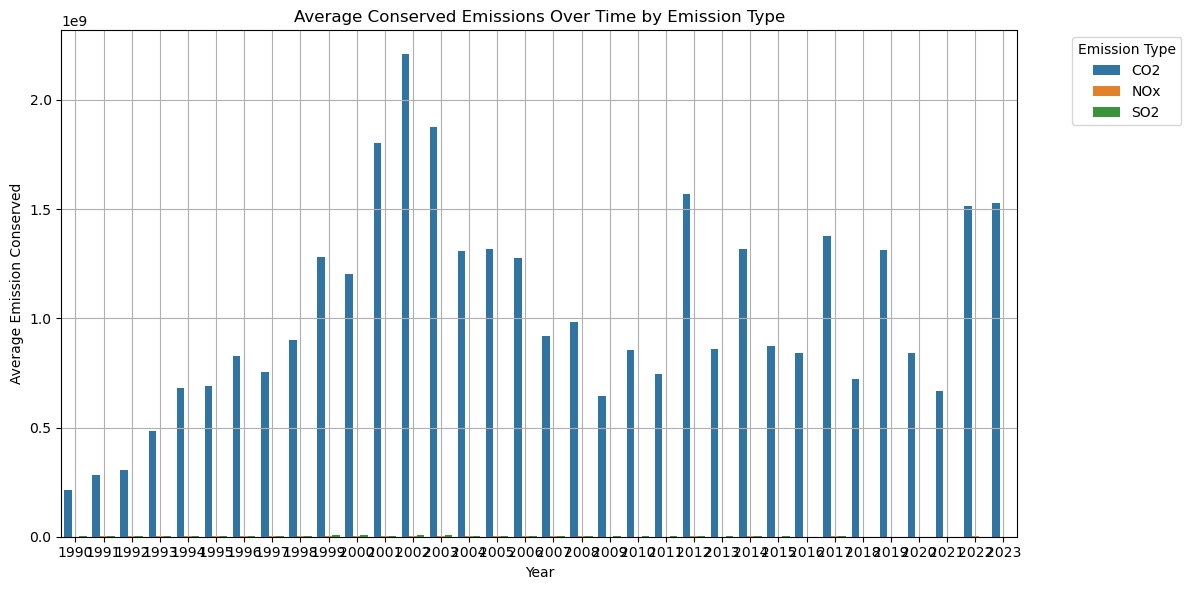